In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


You should consider upgrading via the 'C:\Users\lamia\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\lamia\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install langdetect

     -------------------------------------- 981.5/981.5 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=2fb6b32f728c0ab7d9555f08905bc80579485971096a2f812d08fd2042a22684
  Stored in directory: c:\users\lamia\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


You should consider upgrading via the 'C:\Users\lamia\anaconda3\python.exe -m pip install --upgrade pip' command.


In [52]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
# Authentication
consumerKey = "A1J7tW7h0jyus6NDMplEZtwet"
consumerSecret = "zrkBD4xLfzfx8D6yrflQKwrJNIEBR1KlHMaHMvEdzYgmWPnN6x"
accessToken = "922465646029496320-nAsz8wCqJNhAyXI2zuwl2GmdDufCTZf"
accessTokenSecret = "ZeCEtXrca8iVS0UnrRyXxTieBOhvOA1gG3qLmheYO0wtf"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [54]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze:"))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: UCFCECS
Please enter how many tweets to analyze:10000


In [55]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  80
positive number:  58
negative number:  0
neutral number:  22


In [56]:
tweet_list


,0
0,We are having THE BEST time with our Intro to ...
1,RT @UCFMSE: Congratulations to Stephanie Schre...
2,"Congratulations to Stephanie Schreiner, who ha..."
3,"RT @UCFMSE: A team of MSE researchers, led by ..."
4,"RT @UCFMSE: A team of MSE researchers, led by ..."
...,...
75,RT @UCFALUMNI: 4🍊7 Day 🤝 #UCFDayofGiving\n\nEV...
76,We're having a blast celebrating U-C-F today! ...
77,"We're so thrilled to see our CECS faculty, sta..."
78,RT @UCFCECS: Did you know that $50 can support...


<ipython-input-57-9b7988da67fe>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts = plt.pie(sizes,colors=colors, startangle=90)


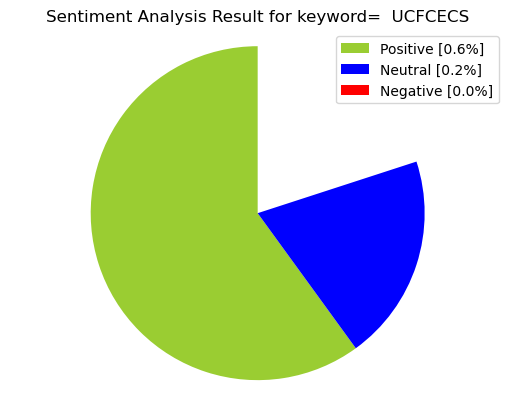

In [57]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [58]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,We are having THE BEST time with our Intro to ...,We are having THE BEST time with our Intro to ...
1,RT @UCFMSE: Congratulations to Stephanie Schre...,RT @UCFMSE: Congratulations to Stephanie Schre...
2,"Congratulations to Stephanie Schreiner, who ha...","Congratulations to Stephanie Schreiner, who ha..."
3,"RT @UCFMSE: A team of MSE researchers, led by ...","RT @UCFMSE: A team of MSE researchers, led by ..."
4,"RT @UCFMSE: A team of MSE researchers, led by ...","RT @UCFMSE: A team of MSE researchers, led by ..."
...,...,...
75,RT @UCFALUMNI: 4🍊7 Day 🤝 #UCFDayofGiving\n\nEV...,RT @UCFALUMNI: 4🍊7 Day 🤝 #UCFDayofGiving\n\nEV...
76,We're having a blast celebrating U-C-F today! ...,We're having a blast celebrating U-C-F today! ...
77,"We're so thrilled to see our CECS faculty, sta...","We're so thrilled to see our CECS faculty, sta..."
78,RT @UCFCECS: Did you know that $50 can support...,RT @UCFCECS: Did you know that $50 can support...


In [59]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,We are having THE BEST time with our Intro to ...,we are having the best time with our intro to ...
1,RT @UCFMSE: Congratulations to Stephanie Schre...,congratulations to stephanie schreiner who h...
2,"Congratulations to Stephanie Schreiner, who ha...",congratulations to stephanie schreiner who ha...
3,"RT @UCFMSE: A team of MSE researchers, led by ...",a team of mse researchers led by assistant p...
4,"RT @UCFMSE: A team of MSE researchers, led by ...",a team of mse researchers led by assistant p...
5,"RT @UCFMSE: A team of MSE researchers, led by ...",a team of mse researchers led by assistant p...
6,"RT @UCFMSE: A team of MSE researchers, led by ...",a team of mse researchers led by assistant p...
7,"A team of MSE researchers, led by Assistant Pr...",a team of mse researchers led by assistant pr...
8,RT @SDESatUCF: This Friday marks the 20th anni...,this friday marks the 20th anniversary of the...
9,RT @UCFAcademics: ⚡ My Why @UCF: Gregory Welch...,my why gregory welch nursing a s...


In [ ]:
string = pd.Series(tw_list["text"]).str.cat(sep=' ')


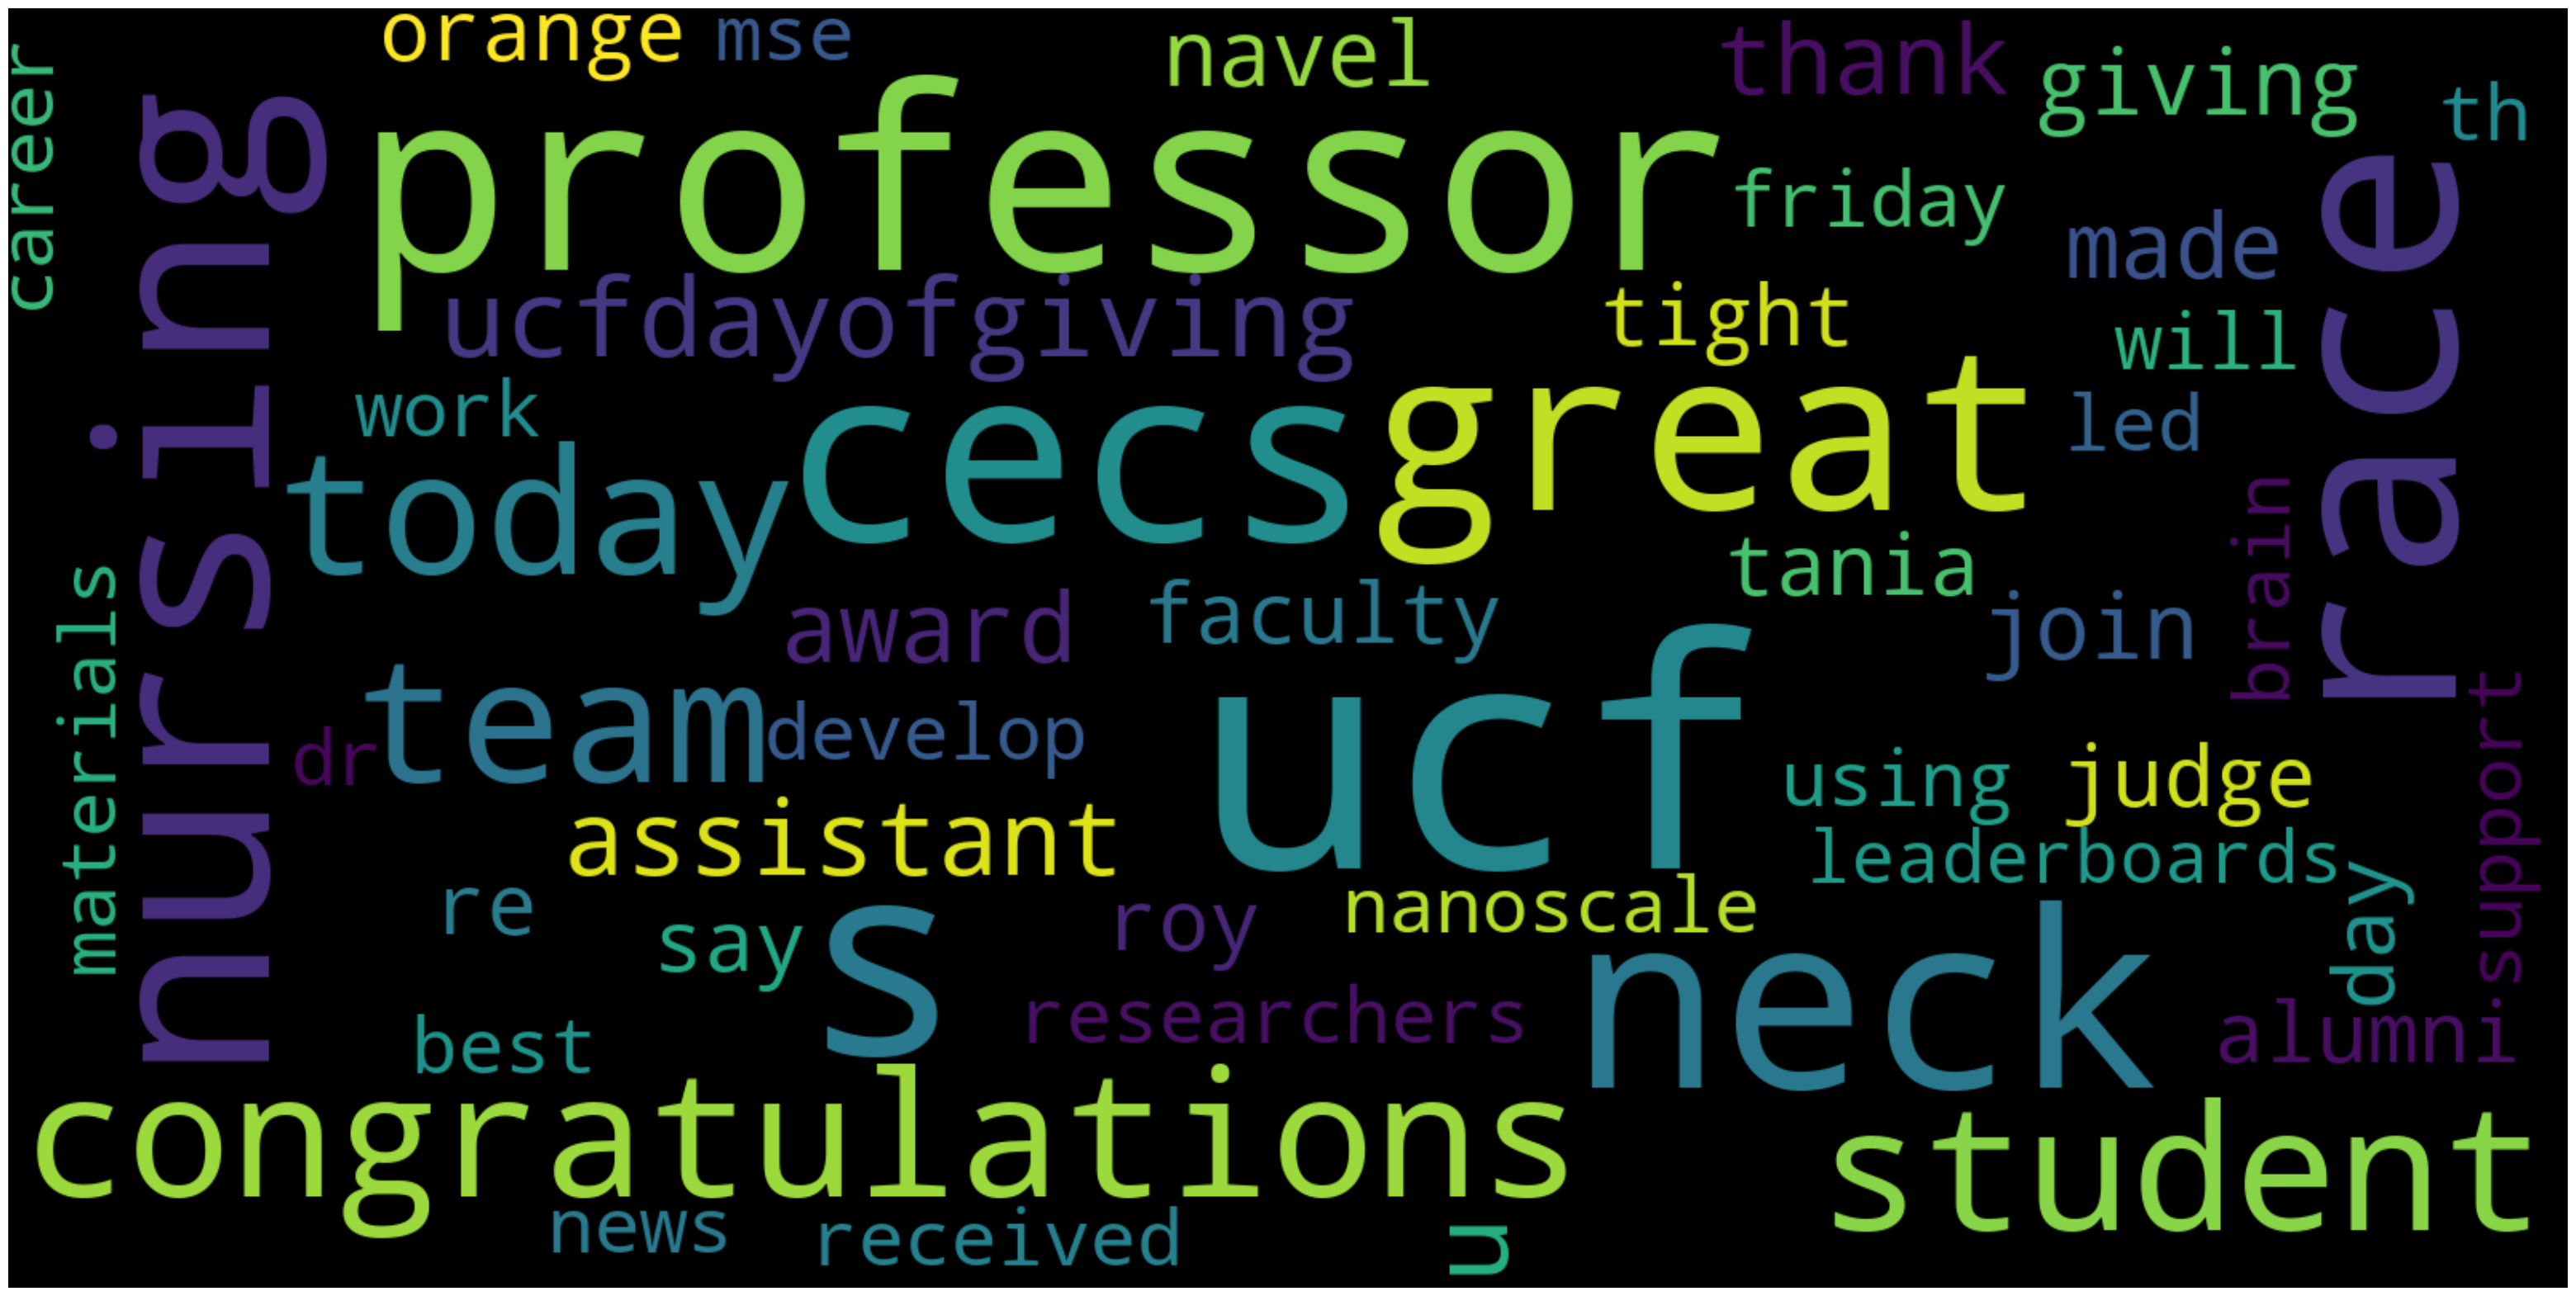

In [62]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]